## Question 6

In [1]:
import numpy

In [2]:
#create MDP environment
class Environment():
    """
    members: - state set S, 
             - action set A, 
             - w, discount factor, 
              - reward function
             - transition probability matrix PU(100*100), PD(100*100), PL(100*100), PR(100*100).
    """    
    def __init__(self, w, disc):
        self.w = w
        self.disc = disc
        #state set
        self.S = numpy.zeros(shape=(10,10))
        self.S = [[(0.0 + 10.0 * i) for i in range(10)],
                  [(1.0 + 10.0 * i) for i in range(10)],
                  [(2.0 + 10.0 * i) for i in range(10)],
                  [(3.0 + 10.0 * i) for i in range(10)],
                  [(4.0 + 10.0 * i) for i in range(10)],
                  [(5.0 + 10.0 * i) for i in range(10)],
                  [(6.0 + 10.0 * i) for i in range(10)],
                  [(7.0 + 10.0 * i) for i in range(10)],
                  [(8.0 + 10.0 * i) for i in range(10)],
                  [(9.0 + 10.0 * i) for i in range(10)]]

        #action set
        self.A = ['up', 'down', 'left', 'right']
        
        #Transition probability
        PU = numpy.zeros(shape=(100,100))#up transition probability
        PD = numpy.zeros(shape=(100,100))#down transition probability
        PL = numpy.zeros(shape=(100,100))#left transition probability
        PR = numpy.zeros(shape=(100,100))#right transition probability
        
        #row is state at time step t, column is state at time step t+1
        # for agent at edge states
        for i in range(1,9):
            PU[i][i] = 1 - self.w + self.w/4.0 #^
            PU[i][i-1] = self.w/4.0 #<
            PU[i][i+1] = self.w/4.0 #>
            PU[i][i+10] = self.w/4.0 #!
            PD[i][i] = self.w/4.0
            PD[i][i-1] = self.w/4.0
            PD[i][i+1] = self.w/4.0
            PD[i][i+10] = 1 - self.w + self.w/4.0
            PL[i][i] = self.w/4.0
            PL[i][i-1] = 1 - self.w + self.w/4.0
            PL[i][i+1] = self.w/4.0
            PL[i][i+10] = self.w/4.0
            PR[i][i] = self.w/4.0
            PR[i][i-1] = self.w/4.0
            PR[i][i+1] = 1 - self.w + self.w/4.0
            PR[i][i+10] = self.w/4.0
        for j in range(1,9):
            i = 10*j
            PU[i][i-10] = 1 - self.w + self.w/4.0 #^
            PU[i][i] = self.w/4.0 #<
            PU[i][i+1] = self.w/4.0 #>
            PU[i][i+10] = self.w/4.0 #!
            PD[i][i-10] = self.w/4.0
            PD[i][i] = self.w/4.0
            PD[i][i+1] = self.w/4.0
            PD[i][i+10] = 1 - self.w + self.w/4.0
            PL[i][i-10] = self.w/4.0
            PL[i][i] = 1 - self.w + self.w/4.0
            PL[i][i+1] = self.w/4.0
            PL[i][i+10] = self.w/4.0
            PR[i][i-10] = self.w/4.0
            PR[i][i] = self.w/4.0
            PR[i][i+1] = 1 - self.w + self.w/4.0
            PR[i][i+10] = self.w/4.0
        for k in range(1,9):
            i = 9 + k*10
            PU[i][i-10] = 1 - self.w + self.w/4.0 #^
            PU[i][i-1] = self.w/4.0 #<
            PU[i][i] = self.w/4.0 #>
            PU[i][i+10] = self.w/4.0 #!
            PD[i][i-10] = self.w/4.0
            PD[i][i-1] = self.w/4.0
            PD[i][i] = self.w/4.0
            PD[i][i+10] = 1 - self.w + self.w/4.0
            PL[i][i-10] = self.w/4.0
            PL[i][i-1] = 1 - self.w + self.w/4.0
            PL[i][i] = self.w/4.0
            PL[i][i+10] = self.w/4.0
            PR[i][i-10] = self.w/4.0
            PR[i][i-1] = self.w/4.0
            PR[i][i] = 1 - self.w + self.w/4.0
            PR[i][i+10] = self.w/4.0
        for n in range(1,9):
            i = 90 + n
            PU[i][i-10] = 1 - self.w + self.w/4.0 #^
            PU[i][i-1] = self.w/4.0 #<
            PU[i][i+1] = self.w/4.0 #>
            PU[i][i] = self.w/4.0 #!
            PD[i][i-10] = self.w/4.0
            PD[i][i-1] = self.w/4.0
            PD[i][i+1] = self.w/4.0
            PD[i][i] = 1 - self.w + self.w/4.0
            PL[i][i-10] = self.w/4.0
            PL[i][i-1] = 1 - self.w + self.w/4.0
            PL[i][i+1] = self.w/4.0
            PL[i][i] = self.w/4.0
            PR[i][i-10] = self.w/4.0
            PR[i][i-1] = self.w/4.0
            PR[i][i+1] = 1 - self.w + self.w/4.0
            PR[i][i] = self.w/4.0
        
            
        # for agent at corner states
        PU[0][0] = 1 - self.w + self.w/4.0 + self.w/4.0
        PU[0][1] = self.w/4.0
        PU[0][10] = self.w/4.0
        PD[0][0] = self.w/4.0 + self.w/4.0
        PD[0][1] = self.w/4.0
        PD[0][10] = 1 - self.w + self.w/4.0 
        PL[0][0] = 1 - self.w + self.w/4.0 + self.w/4.0
        PL[0][1] = self.w/4.0
        PL[0][10] = self.w/4.0
        PR[0][0] = self.w/4.0 + self.w/4.0
        PR[0][1] = 1 - self.w + self.w/4.0
        PR[0][10] = self.w/4.0
                
        PU[9][9] = 1 - self.w + self.w/4.0 + self.w/4.0
        PU[9][8] = self.w/4.0
        PU[9][19] = self.w/4.0        
        PD[9][9] = self.w/4.0 + self.w/4.0
        PD[9][8] = self.w/4.0
        PD[9][19] = 1 - self.w + self.w/4.0
        PL[9][9] = self.w/4.0 + self.w/4.0
        PL[9][8] = 1 - self.w + self.w/4.0 
        PL[9][19] = self.w/4.0
        PR[9][9] = 1 - self.w + self.w/4.0 + self.w/4.0
        PR[9][8]= self.w/4.0
        PR[9][19] = self.w/4.0
           
        PU[90][90] = self.w/4.0 + self.w/4.0
        PU[90][80] = 1 - self.w + self.w/4.0 
        PU[90][91] = self.w/4.0            
        PD[90][90] = 1 - self.w + self.w/4.0 + self.w/4.0
        PD[90][80] = self.w/4.0
        PD[90][91] = self.w/4.0           
        PL[90][90] = 1 - self.w + self.w/4.0 + self.w/4.0
        PL[90][80] = self.w/4.0
        PL[90][91] = self.w/4.0           
        PR[90][90] = self.w/4.0 + self.w/4.0
        PR[90][80]= self.w/4.0
        PR[90][91] = 1 - self.w + self.w/4.0 
        
        PU[99][99] = self.w/4.0 + self.w/4.0
        PU[99][89] = 1 - self.w + self.w/4.0 
        PU[99][98] = self.w/4.0         
        PD[99][99] = 1 - self.w + self.w/4.0 + self.w/4.0
        PD[99][89] = self.w/4.0
        PD[99][98] = self.w/4.0           
        PL[99][99] = self.w/4.0 + self.w/4.0  
        PL[99][89] = self.w/4.0
        PL[99][98] = 1 - self.w + self.w/4.0          
        PR[99][99] = 1 - self.w + self.w/4.0 + self.w/4.0
        PR[99][89]= self.w/4.0
        PR[99][98] = self.w/4.0
        
        # for other states
        for m in range(1,9):
            for n in range(1,9):
                i = m*10 + n
                PU[i][i-10] = 1 - self.w + self.w/4.0 #^
                PU[i][i-1] = self.w/4.0 #<
                PU[i][i+1] = self.w/4.0 #>
                PU[i][i+10] = self.w/4.0 #!
                PD[i][i-10] = self.w/4.0
                PD[i][i-1] = self.w/4.0
                PD[i][i+1] = self.w/4.0
                PD[i][i+10] = 1 - self.w + self.w/4.0
                PL[i][i-10] = self.w/4.0
                PL[i][i-1] = 1 - self.w + self.w/4.0
                PL[i][i+1] = self.w/4.0
                PL[i][i+10] = self.w/4.0
                PR[i][i-10] = self.w/4.0
                PR[i][i-1] = self.w/4.0
                PR[i][i+1] = 1 - self.w + self.w/4.0
                PR[i][i+10] = self.w/4.0
        
        self.PU = PU
        self.PD = PD
        self.PL = PL
        self.PR = PR
        
        #reward function
        
        reward = [0]*100
        reward[14] = -100
        reward[15] = -100
        reward[16] = -100
        reward[24] = -100
        reward[26] = -100
        reward[34] = -100
        reward[36] = -100
        reward[37] = -100
        reward[38] = -100
        reward[44] = -100
        reward[48] = -100
        reward[54] = -100
        reward[58] = -100
        reward[64] = -100
        reward[68] = -100
        reward[76] = -100
        reward[77] = -100
        reward[78] = -100
        reward[86] = -100
        reward[-1] = 10
        """
        reward = [0]*100
        reward[99] = 1.0
        """
        self.reward = reward

In [3]:
import math
# optimal function
def value_iteration(env):
    #initialization
    V = env.S.copy()
    for i in range(10):
        for j in range(10):
            V[i][j] = 0
    change = math.inf
    
    
    #estimation
    while(change > 0.01):
        change = 0
        for i in range(10):
            for j in range(10):
                v = V[i][j]
                k = i * 10 + j
                sumu = 0
                sumd = 0
                suml = 0
                sumr = 0
                c = 0
                for m in env.PU[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumu = sumu + m * (env.reward[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PD[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumd = sumd + m * (env.reward[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PL[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        suml = suml + m * (env.reward[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PR[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumr = sumr + m * (env.reward[c] + env.disc * V[t][z])
                    c = c + 1
                V[i][j] = max(sumd, sumu, sumr, suml)
                change = max(change, abs(v - V[i][j]))
        
    
    return V
     
    
V = value_iteration(Environment(w =0.1,disc = 0.8)) 

In [4]:
print(V)

[[0.6484774670781449, 0.7941065146926513, 0.8252378999658337, 0.536245558042254, -2.37043156293186, -4.233816782108842, -1.9205297107086459, 1.1311079536379822, 1.5943558395673492, 2.038207264516867], [0.8298519476343293, 1.0212359641806181, 1.0660329628073277, -1.8679043604242553, -6.7382194194750245, -8.673754455672396, -6.369794682320233, -1.294796260454806, 1.9283432117924324, 2.61046946544738], [1.0636096158077188, 1.316512536286599, 1.4500772851165296, -1.624025018470016, -6.741508863716399, -13.911181835195762, -9.649225184997134, -5.511043252279819, -0.1310127083535395, 3.359058662410678], [1.3602524499428625, 1.6926987655247931, 1.9480228466707195, -1.232168986136106, -6.323084794852278, -7.977606033620619, -7.936679801832399, -9.423868793194718, -1.9144283532563287, 4.390625252365628], [1.7365722444380909, 2.171602275076347, 2.589832666388159, -0.725587435279598, -5.830729923707404, -3.253625500440105, -3.230200141695722, -7.41906241018066, 1.7189820922213537, 9.1631014650671

<bound method Artist.properties of <matplotlib.table.Table object at 0x10ea7a358>>


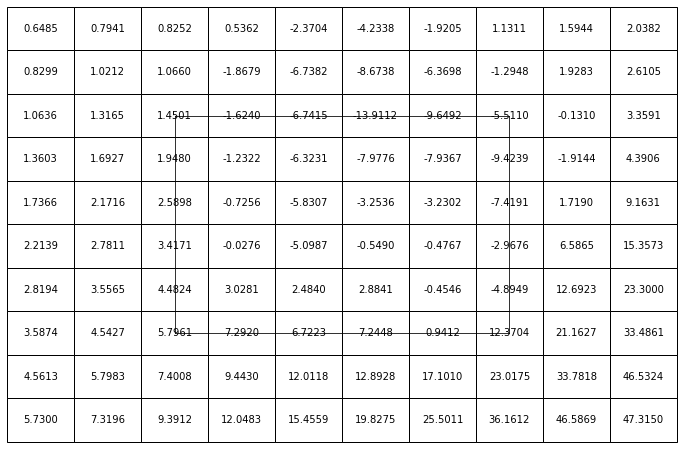

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

nx = 10
ny = 10

cell_text=[]
for row in range(10):
    v_row = V[row]
    cell_text.append(['%1.4f' % (x) for x in v_row])

plt.figure()
tb = plt.table(cellText=cell_text, loc = 'center',cellLoc='center',bbox=None)

print(tb.properties)

tc = tb.properties()['child_artists']
for cell in tc: 
    cell.set_height(2/ny)
    cell.set_width(2/nx)

ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()



## Question 7

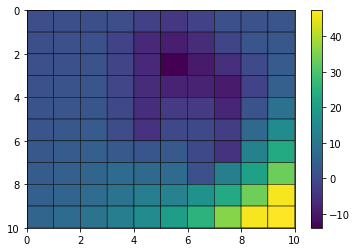

In [6]:
plt.pcolor(V,edgecolors='k',linewidths=0.5)
plt.colorbar()
plt.gca().invert_yaxis()